In [1]:
import pickle
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mat = pickle.load(open("../../picklefiles/nmf_V3.pkl", "rb"))

In [3]:
df = pd.read_csv('../../data/twitter/all.csv', delimiter=';')
if len(df.columns)==6:
    df.columns = [u'date', u'text', u'geo', u'mentions', u'hashtags', u'Unnamed: 5']
elif len(df.columns)==7:
    df.columns = [u'date', u'text', u'geo', u'mentions', u'hashtags', u'Unnamed: 5','yo']
else:
    print 'too many columns', len(df.columns)
print "length of dataframe",len(df)

too many columns 9
length of dataframe 842130


In [4]:
df['date'] = df.date.apply(datetime.datetime.strptime, args=('%Y-%m-%d',))

In [5]:
dates = df['date']
mat_df = pd.DataFrame(mat)
mat_df['date']=dates

In [6]:
groupdate = mat_df.groupby([mat_df.date.dt.year, mat_df.date.dt.month]).sum()
groupdate.index.names=['year','month']
groupdate.drop(groupdate.index[0:4], inplace=True)

In [7]:
date_counts = mat_df.groupby([mat_df.date.dt.year, mat_df.date.dt.month]).count()
date_counts.index.names=['year','month']
date_counts.drop(date_counts.index[0:4], inplace=True)

In [8]:
groupdate.head(7)

0         1         2         3         4          5   \
year month                                                                 
2012 12     37.618208  3.285961  7.649520  0.196067  8.719520  19.632057   
2013 1      38.965016  3.505510  8.586334  0.274940  7.668215  17.781429   
     2      37.297072  3.548749  6.801468  0.220101  7.977853  15.332703   
     3      41.665475  3.612899  7.974364  0.392820  9.170820  17.144110   
     4      39.845770  4.028775  8.794504  0.464511  7.405046  15.534745   
     5      37.235204  3.865834  9.214859  0.338935  8.288463  15.490501   
     6      36.239804  2.935918  9.547393  1.766611  6.955821  14.734946   

                  6          7          8         9         10        11  \
year month                                                                 
2012 12     8.302287   9.228372  11.884803  4.889290  0.781218  2.836071   
2013 1      7.518661   9.296643  12.028457  4.052606  0.707800  2.467582   
     2      7.699766   7.995290  10.313031  3.637113  0.561223  2.232083   
     3      8.192660   9.461579  10.182510  4.522794  0.950288  3.875593   
     4      8.790152   9.741638   7.991376  3.887993  0.663059  3.280257   
     5      8.252431   9.931684  11.233193  4.406824  0.588224  3.753712   
     6      8.559875  10.214164   8.393319  4.766046  0.733800  4.133247   

                   12        13         14        15        16         17  \
year month                                                                  
2012 12      4.511357  0.756196  12.313554  4.736223  4.620000   3.841802   
2013 1       4.384333  0.696467   8.510449  4.011536  4.481605   3.895985   
     2       4.733935  0.972781   7.751495  3.341491  3.442262   4.658591   
     3       5.846749  1.401943   9.748653  4.029663  3.952259   7.421150   
     4       6.275254  1.154042   6.387944  3.841839  4.659910  10.003378   
     5      10.248204  1.431734   4.661938  3.497560  3.413608  10.912141   
     6       6.307063  1.247743   3.717390  4.140362  3.253505  12.181322   

                  18        19  
year month                      
2012 12     8.612809  1.517680  
2013 1      7.645320  1.417287  
     2      7.838756  1.220106  
     3      6.492363  1.505621  
     4      6.754836  1.578379  
     5      6.234700  1.474645  
     6      5.713990  2.220326

In [9]:
#groupdate.drop(groupdate.index[0:4], inplace=True)

In [10]:
new = groupdate/date_counts

In [11]:
del new['date']

In [14]:
topic = []
for i in np.arange(1,21):
    topic.append("Topic "+str(i))
new.columns = topic

In [22]:
new.columns=['Blamain', 'Ripped Jean','Blue Jeans','Levis','Jeans?','Skinny Jean','Luke Hemmings','White Shirts, James Dean','Apple Buttom Jeans', 'Black Jean','Luke Hemmings','High Waisted Jean','White Jeans','Boy friend Jeans','Leggings','Mom Jeans','??','Boot cut, Shorts, Basketball','??','Painted Jean']

In [21]:
len(yo)

20

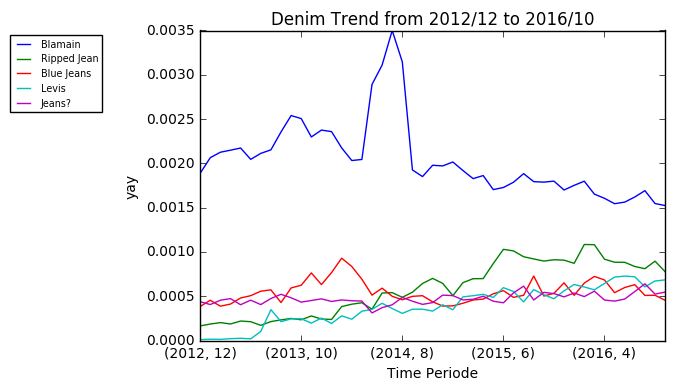

In [37]:
ax = new.iloc[:,:5].plot()
ax.set_xlabel('Time Periode')
ax.set_ylabel('yay')
ax.set_title('Denim Trend from 2012/12 to 2016/10')
#ax.x_ticklabels(new.)
#plt.figure(figsize=(30,30))
plt.legend(fontsize = 'x-small', bbox_to_anchor=(-0.2, 1.0))
#plt.legend(loc='upper right')

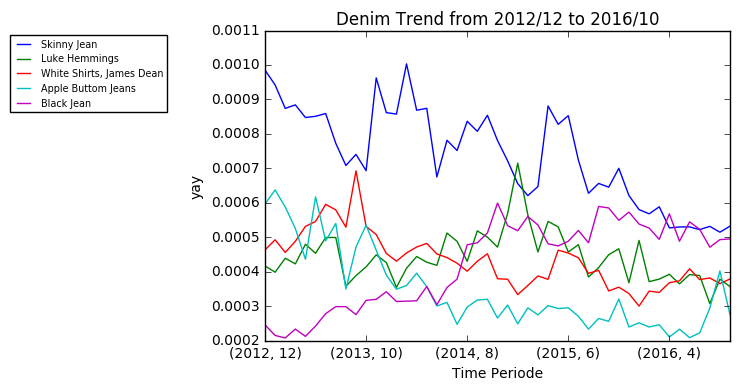

In [40]:
ax = new.iloc[:,5:10].plot()
ax.set_xlabel('Time Periode')
ax.set_ylabel('yay')
ax.set_title('Denim Trend from 2012/12 to 2016/10')
#ax.x_ticklabels(new.)
#plt.figure(figsize=(30,30))
plt.legend(fontsize = 'x-small', bbox_to_anchor=(-0.2, 1.0))
#plt.legend(loc='upper right')

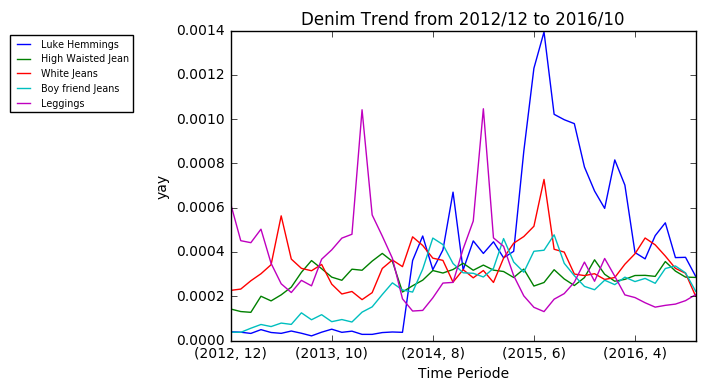

In [41]:
ax = new.iloc[:,10:15].plot()
ax.set_xlabel('Time Periode')
ax.set_ylabel('yay')
ax.set_title('Denim Trend from 2012/12 to 2016/10')
#ax.x_ticklabels(new.)
#plt.figure(figsize=(30,30))
plt.legend(fontsize = 'x-small', bbox_to_anchor=(-0.2, 1.0))
#plt.legend(loc='upper right')

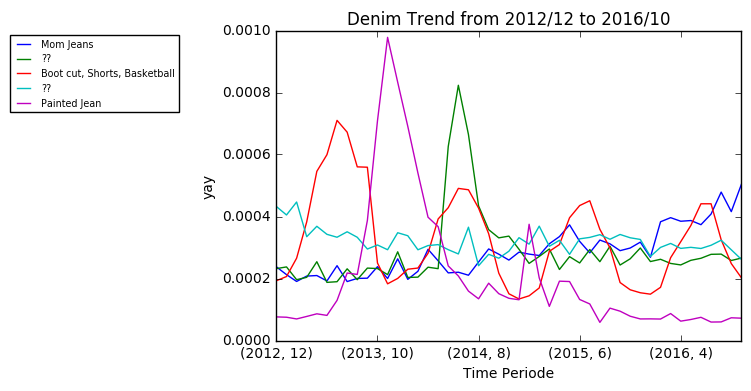

In [42]:
ax = new.iloc[:,15:20].plot()
ax.set_xlabel('Time Periode')
ax.set_ylabel('yay')
ax.set_title('Denim Trend from 2012/12 to 2016/10')
#ax.x_ticklabels(new.)
#plt.figure(figsize=(30,30))
plt.legend(fontsize = 'x-small', bbox_to_anchor=(-0.2, 1.0))
#plt.legend(loc='upper right')

In [99]:
new.head(7)

0         1         2         3         4         5   \
year month                                                               
2012 12     0.001808  0.000151  0.000377  0.000010  0.000434  0.000973   
2013 1      0.001972  0.000174  0.000446  0.000015  0.000403  0.000929   
     2      0.002050  0.000192  0.000381  0.000013  0.000451  0.000860   
     3      0.002077  0.000173  0.000402  0.000020  0.000470  0.000870   
     4      0.002107  0.000207  0.000464  0.000025  0.000401  0.000834   
     5      0.001976  0.000196  0.000493  0.000019  0.000453  0.000837   
     6      0.002026  0.000157  0.000542  0.000103  0.000403  0.000838   

                  6         7         8         9     ...           40  \
year month                                            ...                
2012 12     0.000317  0.000340  0.000509  0.000241    ...     0.000231   
2013 1      0.000305  0.000396  0.000552  0.000211    ...     0.000264   
     2      0.000340  0.000327  0.000513  0.000203    ...     0.000221   
     3      0.000323  0.000351  0.000460  0.000229    ...     0.000241   
     4      0.000377  0.000413  0.000385  0.000208    ...     0.000234   
     5      0.000363  0.000404  0.000538  0.000237    ...     0.000262   
     6      0.000406  0.000476  0.000431  0.000273    ...     0.000286   

                  41        42        43        44        45        46  \
year month                                                               
2012 12     0.000235  0.000212  0.000259  0.000216  0.000032  0.000118   
2013 1      0.000281  0.000212  0.000187  0.000210  0.000048  0.000117   
     2      0.000276  0.000147  0.000218  0.000234  0.000059  0.000138   
     3      0.000301  0.000137  0.000221  0.000207  0.000063  0.000125   
     4      0.000198  0.000104  0.000237  0.000245  0.000125  0.000127   
     5      0.000146  0.000102  0.000302  0.000299  0.000144  0.000142   
     6      0.000075  0.000073  0.000268  0.000264  0.000395  0.000115   

                  47        48        49  
year month                                
2012 12     0.000021  0.000116  0.000224  
2013 1      0.000015  0.000090  0.000196  
     2      0.000017  0.000066  0.000190  
     3      0.000044  0.000095  0.000224  
     4      0.000089  0.000080  0.000213  
     5      0.000068  0.000090  0.000216  
     6      0.000055  0.000104  0.000233  

[7 rows x 50 columns]